# Task 3 Startup success rate prediction


The task is to develop a machine learning model that can predict the success rate of startup base on various attributes and features startup success rate prediction involves analysing factor such as funding term composition industry market trends and other relevant variables to estimate the likelihood of a startups success to goal is to create a model that can accurately predict the success or failure of startups assisting entrepreneurs investors and stack holders in making informed decisions.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings 
warnings.filterwarnings('ignore')
from statistics import mean
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
accuracy = []
precision = []
recall = []
fscore = []

In [11]:
# load data 
# reading the CSV file
csvFile = pd.read_csv('C:/Users/gb/Videos/Task/T3/startup data.csv',encoding='latin-1')
 
# displaying the contents of the CSV file
print(csvFile)

     Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0          1005         CA  42.358880  -71.056820    92101   c:6669   
1           204         CA  37.238916 -121.973718    95032  c:16283   
2          1001         CA  32.901049 -117.192656    92121  c:65620   
3           738         CA  37.320309 -122.050040    95014  c:42668   
4          1002         CA  37.779281 -122.419236    94105  c:65806   
..          ...        ...        ...         ...      ...      ...   
918         352         CA  37.740594 -122.376471    94107  c:21343   
919         721         MA  42.504817  -71.195611     1803  c:41747   
920         557         CA  37.408261 -122.015920    94089  c:31549   
921         589         CA  37.556732 -122.288378    94404  c:33198   
922         462         CA  37.386778 -121.966277    95054  c:26702   

              city              Unnamed: 6                  name  labels  ...  \
0        San Diego                     NaN           Bandsintown  

In [12]:
csvFile.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [13]:
csvFile.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [14]:
csvFile = csvFile.drop(['Unnamed: 0', 'state_code','Unnamed: 6','latitude', 'longitude', 'zip_code','object_id','status'],axis=1)

In [15]:
csvFile.describe()

,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [18]:
csvFile['closed_at'] = pd.to_datetime(csvFile['closed_at'])
csvFile['founded_at'] = pd.to_datetime(csvFile['founded_at'])

csvFile['last_date']=csvFile['closed_at']

csvFile['last_date']=csvFile['last_date'].fillna('2013-12-31')
csvFile['last_date']=pd.to_datetime(csvFile['last_date'])

csvFile["age"] = csvFile["last_date"]-csvFile["founded_at"]
csvFile["age"]=round(csvFile.age/np.timedelta64(1,'Y'))
csvFile.head()

,id,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,last_date,age
0,c:6669,San Diego,Bandsintown,1,2007-01-01,NaT,4/1/2009,1/1/2010,2.2493,3.0027,...,0,1,0,0,0,0,1.0000,0,2013-12-31,7.0
1,c:16283,Los Gatos,TriCipher,1,2000-01-01,NaT,2/14/2005,12/28/2009,5.1260,9.9973,...,1,0,0,1,1,1,4.7500,1,2013-12-31,14.0
2,c:65620,San Diego,Plixi,1,2009-03-18,NaT,3/30/2010,3/30/2010,1.0329,1.0329,...,0,0,1,0,0,0,4.0000,1,2013-12-31,5.0
3,c:42668,Cupertino,Solidcore Systems,1,2002-01-01,NaT,2/17/2005,4/25/2007,3.1315,5.3151,...,0,0,0,1,1,1,3.3333,1,2013-12-31,12.0
4,c:65806,San Francisco,Inhale Digital,0,2010-08-01,2012-10-01,8/1/2010,4/1/2012,0.0000,1.6685,...,1,1,0,0,0,0,1.0000,1,2012-10-01,2.0


In [19]:
#will check erros in the data
csvFile[['founded_at','closed_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year','age','labels']].sort_values('age').head(10)

,founded_at,closed_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,age,labels
88,2013-01-01,2005-01-01,0.8822,0.8822,NaN,NaN,-8.0,0
558,2013-04-16,2009-05-04,-9.0466,-9.0466,-6.0466,-3.8822,-4.0,0
73,2003-01-01,2001-02-01,1.6685,9.3370,7.3808,10.4740,-2.0,1
690,2012-08-01,2013-01-01,0.0000,0.6904,0.0000,0.6904,0.0,0
350,2009-01-01,2009-05-18,0.3288,0.3288,-0.4192,-0.4192,0.0,0
375,2011-01-08,2012-01-01,0.3616,0.3616,0.3753,0.5425,1.0,0
496,2011-09-01,2012-11-01,0.6658,0.6658,0.4192,0.4192,1.0,0
434,2010-01-01,2011-02-01,0.8329,0.8329,0.6658,0.6658,1.0,0
585,2012-01-01,2013-05-01,0.2986,0.2986,0.2986,0.2986,1.0,0
280,2011-11-11,2013-01-01,0.0548,0.0548,0.0685,0.4000,1.0,0


In [20]:
#age cannot be negative so lets drop the negative agecsvFile=csvFile.drop(csvFile[csvFile.age<0].index)
csvFile=csvFile.drop(csvFile[csvFile.age_first_funding_year<0].index)
csvFile=csvFile.drop(csvFile[csvFile.age_last_funding_year<0].index)
csvFile=csvFile.drop(csvFile[csvFile.age_first_milestone_year<0].index)
csvFile=csvFile.drop(csvFile[csvFile.age_last_milestone_year<0].index)

In [21]:
csvFile[['founded_at','closed_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year','age','labels']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 840 entries, 0 to 922
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   founded_at                840 non-null    datetime64[ns]
 1   closed_at                 296 non-null    datetime64[ns]
 2   age_first_funding_year    840 non-null    float64       
 3   age_last_funding_year     840 non-null    float64       
 4   age_first_milestone_year  696 non-null    float64       
 5   age_last_milestone_year   696 non-null    float64       
 6   age                       840 non-null    float64       
 7   labels                    840 non-null    int64         
dtypes: datetime64[ns](2), float64(5), int64(1)
memory usage: 59.1 KB


In [22]:
csvFile=csvFile.drop(csvFile[csvFile.age<0].index)

In [23]:
#filling in the features of age_first_milestone_year, age_last_milestone_year with 0 in NAN
csvFile['age_first_milestone_year']=csvFile['age_first_milestone_year'].fillna(0)
csvFile['age_last_milestone_year']=csvFile['age_last_milestone_year'].fillna(0)

In [24]:
features = ['age_first_funding_year', 'age_last_funding_year','age_first_milestone_year',
               'age_last_milestone_year', 'relationships','funding_rounds', 'funding_total_usd',
               'milestones','avg_participants', 'age']

In [25]:
csvFile[features].skew(axis=0, skipna=True)<2

age_first_funding_year      False
age_last_funding_year        True
age_first_milestone_year     True
age_last_milestone_year      True
relationships               False
funding_rounds               True
funding_total_usd           False
milestones                   True
avg_participants             True
age                          True
dtype: bool

In [26]:
#logtransformation and  NORMALIZATION
features=['age_first_funding_year','relationships','avg_participants']

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

for var in features :
    csvFile['norm_'+var] =np.log1p(csvFile[var])

features_2=['norm_age_first_funding_year', 'norm_relationships','norm_avg_participants']

for var in features_2 :
    csvFile[var] = MinMaxScaler().fit_transform(csvFile[var].values.reshape(len(csvFile), 1))

In [28]:
#SKEW AFTER PRE PROCESSING
print(csvFile[features_2].skew(axis=0, skipna=True))

norm_age_first_funding_year    0.246901
norm_relationships            -0.212372
norm_avg_participants          0.426161
dtype: float64


In [29]:
features1=['funding_total_usd']

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

for var in features :
    csvFile['norm_'+var] =np.log1p(csvFile[var])

features_21=['norm_funding_total_usd']

for var in features_2 :
    csvFile[var] = MinMaxScaler().fit_transform(csvFile[var].values.reshape(len(csvFile), 1))

In [32]:
csvFile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838 entries, 0 to 922
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           838 non-null    object        
 1   city                         838 non-null    object        
 2   name                         838 non-null    object        
 3   labels                       838 non-null    int64         
 4   founded_at                   838 non-null    datetime64[ns]
 5   closed_at                    294 non-null    datetime64[ns]
 6   first_funding_at             838 non-null    object        
 7   last_funding_at              838 non-null    object        
 8   age_first_funding_year       838 non-null    float64       
 9   age_last_funding_year        838 non-null    float64       
 10  age_first_milestone_year     838 non-null    float64       
 11  age_last_milestone_year      838 non-null    float

In [34]:
X = csvFile[['age_last_funding_year','age_first_milestone_year', 'age_last_milestone_year',
       'funding_rounds','milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'age',
        'norm_age_first_funding_year',
       'norm_relationships']]

y = csvFile['labels']
# target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

('age_last_funding_year', 0, 0.059354512860015175)
('age_first_milestone_year', 1, 0.20100129499491895)
('age_last_milestone_year', 2, 0.27923036347163)
('funding_rounds', 3, 0.20180717783158889)
('milestones', 4, 0.2742681113932936)
('is_CA', 5, 0.02379733500136985)
('is_NY', 6, 0.12515658898375934)
('is_MA', 7, 0.0720160666934938)
('is_TX', 8, -0.035439044503897094)
('is_otherstate', 9, -0.15854271134440265)
('is_software', 10, -0.011447478597961308)
('is_web', 11, 0.03342323837512179)
('is_mobile', 12, 0.03244965169382902)
('is_enterprise', 13, 0.07098693766496127)
('is_advertising', 14, 0.05060612701150923)
('is_gamesvideo', 15, -0.059183312988717776)
('is_ecommerce', 16, -0.07798232554023253)
('is_biotech', 17, -0.018516893823349312)
('is_consulting', 18, 0.028304560932281255)
('is_othercategory', 19, -0.03910014965246111)
('has_VC', 20, -0.04994120468944252)
('has_angel', 21, -0.05150400477891345)
('has_roundA', 22, 0.12725588786846642)
('has_roundB', 23, 0.17268871974909128)
('h

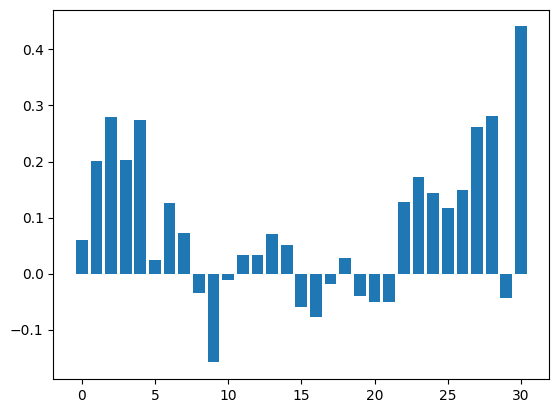

In [35]:
#r_regression feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=r_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
column_headers = list(X_train.columns.values)
for i in range(len(fs.scores_)):
	print( (column_headers[i],i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


In [36]:
Frame_csvFile={'columns': column_headers,
        'fs_score': fs.scores_

}
feature_selection_df= pd.DataFrame(Frame_csvFile)
print(feature_selection_df)

                        columns  fs_score
0         age_last_funding_year  0.059355
1      age_first_milestone_year  0.201001
2       age_last_milestone_year  0.279230
3                funding_rounds  0.201807
4                    milestones  0.274268
5                         is_CA  0.023797
6                         is_NY  0.125157
7                         is_MA  0.072016
8                         is_TX -0.035439
9                 is_otherstate -0.158543
10                  is_software -0.011447
11                       is_web  0.033423
12                    is_mobile  0.032450
13                is_enterprise  0.070987
14               is_advertising  0.050606
15                is_gamesvideo -0.059183
16                 is_ecommerce -0.077982
17                   is_biotech -0.018517
18                is_consulting  0.028305
19             is_othercategory -0.039100
20                       has_VC -0.049941
21                    has_angel -0.051504
22                   has_roundA  0

In [37]:
feature_selection_df['fs_score']=feature_selection_df['fs_score'].abs()

In [38]:
print(feature_selection_df)

                        columns  fs_score
0         age_last_funding_year  0.059355
1      age_first_milestone_year  0.201001
2       age_last_milestone_year  0.279230
3                funding_rounds  0.201807
4                    milestones  0.274268
5                         is_CA  0.023797
6                         is_NY  0.125157
7                         is_MA  0.072016
8                         is_TX  0.035439
9                 is_otherstate  0.158543
10                  is_software  0.011447
11                       is_web  0.033423
12                    is_mobile  0.032450
13                is_enterprise  0.070987
14               is_advertising  0.050606
15                is_gamesvideo  0.059183
16                 is_ecommerce  0.077982
17                   is_biotech  0.018517
18                is_consulting  0.028305
19             is_othercategory  0.039100
20                       has_VC  0.049941
21                    has_angel  0.051504
22                   has_roundA  0

In [39]:
feature_selection_df=feature_selection_df.sort_values('fs_score')
print(feature_selection_df)

                        columns  fs_score
10                  is_software  0.011447
17                   is_biotech  0.018517
5                         is_CA  0.023797
18                is_consulting  0.028305
12                    is_mobile  0.032450
11                       is_web  0.033423
8                         is_TX  0.035439
19             is_othercategory  0.039100
29  norm_age_first_funding_year  0.043297
20                       has_VC  0.049941
14               is_advertising  0.050606
21                    has_angel  0.051504
15                is_gamesvideo  0.059183
0         age_last_funding_year  0.059355
13                is_enterprise  0.070987
7                         is_MA  0.072016
16                 is_ecommerce  0.077982
25                   has_roundD  0.116514
6                         is_NY  0.125157
22                   has_roundA  0.127256
24                   has_roundC  0.143168
26             avg_participants  0.149731
9                 is_otherstate  0

In [40]:
X = csvFile[['age_last_funding_year','age_first_milestone_year', 'age_last_milestone_year',
       'funding_rounds','milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'age',
        'norm_age_first_funding_year',
       'norm_relationships']]
X=X.drop(['age_last_funding_year','is_software','is_web','is_mobile','has_VC','is_consulting','is_othercategory','is_CA','has_angel','is_gamesvideo','is_MA','is_NY','is_ecommerce','is_biotech','has_roundD','is_TX','is_advertising','norm_age_first_funding_year','is_otherstate','is_enterprise','avg_participants'
], axis = 1)

y = csvFile['labels']
# target / label
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [41]:
X_train.head()

,age_first_milestone_year,age_last_milestone_year,funding_rounds,milestones,has_roundA,has_roundB,has_roundC,is_top500,age,norm_relationships
902,0.3370,10.0082,3,3,1,1,1,1,14.0,0.773976
253,0.0000,0.7562,1,2,0,0,0,0,2.0,0.333333
237,1.5808,1.5808,2,1,0,0,0,0,4.0,0.264160
637,5.8384,5.8384,1,1,0,0,0,1,13.0,0.386988
360,6.0055,6.0055,2,1,0,0,0,1,14.0,0.792481


In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586 entries, 902 to 113
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age_first_milestone_year  586 non-null    float64
 1   age_last_milestone_year   586 non-null    float64
 2   funding_rounds            586 non-null    int64  
 3   milestones                586 non-null    int64  
 4   has_roundA                586 non-null    int64  
 5   has_roundB                586 non-null    int64  
 6   has_roundC                586 non-null    int64  
 7   is_top500                 586 non-null    int64  
 8   age                       586 non-null    float64
 9   norm_relationships        586 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 50.4 KB


# Data Preprocessing

State Code Variable
Check whether the state_code and state_code.1 variables contain the same data for each row - One row is not equal to each other, because in state_code.1 variable it is a missing value. Therefore we assume the correct column is state_code (considering the city column).
Reduce the number of categories - Top 5 categories of the state_code variable covers more than 80% from all the data. 
Therefore the other categories apart from the top 5 (CA,NY,MA,TX,WA) are considere as 'other'.

In [45]:
data = pd.read_csv('C:/Users/gb/Videos/Task/T3/startup data.csv',encoding='latin-1')
print(data['state_code'].equals(data['state_code.1']))

False


In [46]:
df = data.loc[data['state_code'] != data['state_code.1']]
df.style.set_properties(**{'background-color': 'yellow'}, subset=['state_code','state_code.1'])

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
515,1110,CA,37.451124,-122.166264,94025,c:856,Menlo Park,nan,Cuil,0,1/1/2005,9/1/2010,3/1/2007,4/15/2008,2.161600,3.287700,3.498600,7.690400,13,2,33000000,4,nan,0,0,0,0,0,search,0,0,0,0,0,0,0,0,0,1,c:856,0,0,1,1,0,0,2.500000,1,closed


In [50]:
data['State'] = 'other'
data.loc[(data['state_code'] == 'CA'), 'State'] = 'CA'
data.loc[(data['state_code'] == 'NY'), 'State'] = 'NY'
data.loc[(data['state_code'] == 'MA'), 'State'] = 'MA'
data.loc[(data['state_code'] == 'TX'), 'State'] = 'TX'
data.loc[(data['state_code'] == 'WA'), 'State'] = 'WA'

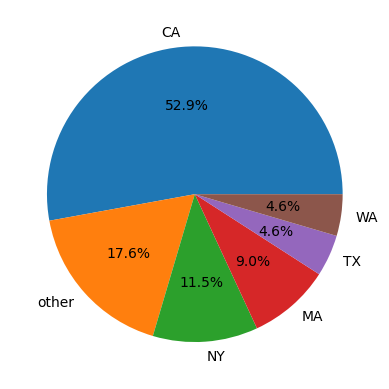

In [51]:
state_count = data['State'].value_counts()
plt.pie(state_count, labels = state_count.index, autopct = '%1.1f%%')
plt.show()

In [52]:
data = data.drop(['state_code','state_code.1','is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate'],axis =1)

In [55]:
print (data)

     Unnamed: 0   latitude   longitude zip_code       id           city  \
0          1005  42.358880  -71.056820    92101   c:6669      San Diego   
1           204  37.238916 -121.973718    95032  c:16283      Los Gatos   
2          1001  32.901049 -117.192656    92121  c:65620      San Diego   
3           738  37.320309 -122.050040    95014  c:42668      Cupertino   
4          1002  37.779281 -122.419236    94105  c:65806  San Francisco   
..          ...        ...         ...      ...      ...            ...   
918         352  37.740594 -122.376471    94107  c:21343  San Francisco   
919         721  42.504817  -71.195611     1803  c:41747     Burlington   
920         557  37.408261 -122.015920    94089  c:31549      Sunnyvale   
921         589  37.556732 -122.288378    94404  c:33198  San Francisco   
922         462  37.386778 -121.966277    95054  c:26702    Santa Clara   

                 Unnamed: 6                  name  labels founded_at  ...  \
0                     

In [56]:
data['status'] = np.where(data['status']=='acquired',1,0)

In [57]:
print(data['labels'].equals(data['status']))

False


In [58]:
data = data.drop(['labels'], axis = 1)

In [59]:
prop_df = data.groupby('status').size().reset_index(name = 'counts')
prop_df['proportions'] = prop_df['counts']/prop_df['counts'].sum()

Text(0.5, 1.0, 'Distribution of Status of the Startup')

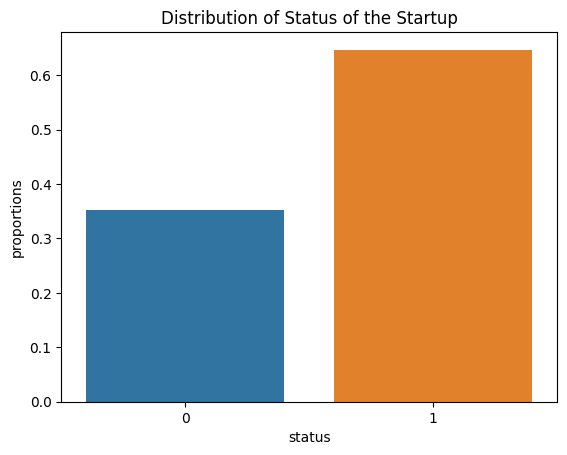

In [60]:
sns.barplot(data = prop_df, x = 'status', y = 'proportions')
plt.title('Distribution of Status of the Startup')

In [72]:
data.describe()

,Unnamed: 0,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
count,921.000000,921.000000,921.000000,921.000000,921.000000,769.000000,769.000000,921.000000,921.000000,9.210000e+02,...,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,572.116178,38.519781,-103.498835,2.235124,3.930992,3.053334,4.742804,7.711183,2.310532,2.542023e+07,...,0.322476,0.325733,0.255157,0.508143,0.391965,0.232356,0.099891,2.836607,0.808903,0.647123
std,333.253371,3.745224,22.401689,2.513112,2.970848,2.980619,3.207224,7.269141,1.392210,1.898400e+08,...,0.467678,0.468903,0.436187,0.500205,0.488454,0.422564,0.300018,1.875250,0.393379,0.478125
min,1.000000,25.752358,-122.756956,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,284.000000,37.388869,-122.200914,0.572600,1.668500,1.000000,2.383600,3.000000,1.000000,2.700000e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,577.000000,37.779281,-118.356970,1.441100,3.528800,2.517800,4.474000,5.000000,2.000000,1.000000e+07,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000
75%,866.000000,40.730646,-77.212493,3.580800,5.561600,4.690400,6.753400,10.000000,3.000000,2.470000e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000
max,1153.000000,59.335232,18.057121,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


In [73]:
data['has_VC'] = data['has_VC'].apply(str)
data['has_angel'] = data['has_angel'].apply(str)
data['has_roundA'] = data['has_roundA'].apply(str)
data['has_roundB'] = data['has_roundB'].apply(str)
data['has_roundC'] = data['has_roundC'].apply(str)
data['has_roundD'] = data['has_roundD'].apply(str)
data['is_top500'] = data['is_top500'].apply(str)
data['status'] = data['status'].apply(str)

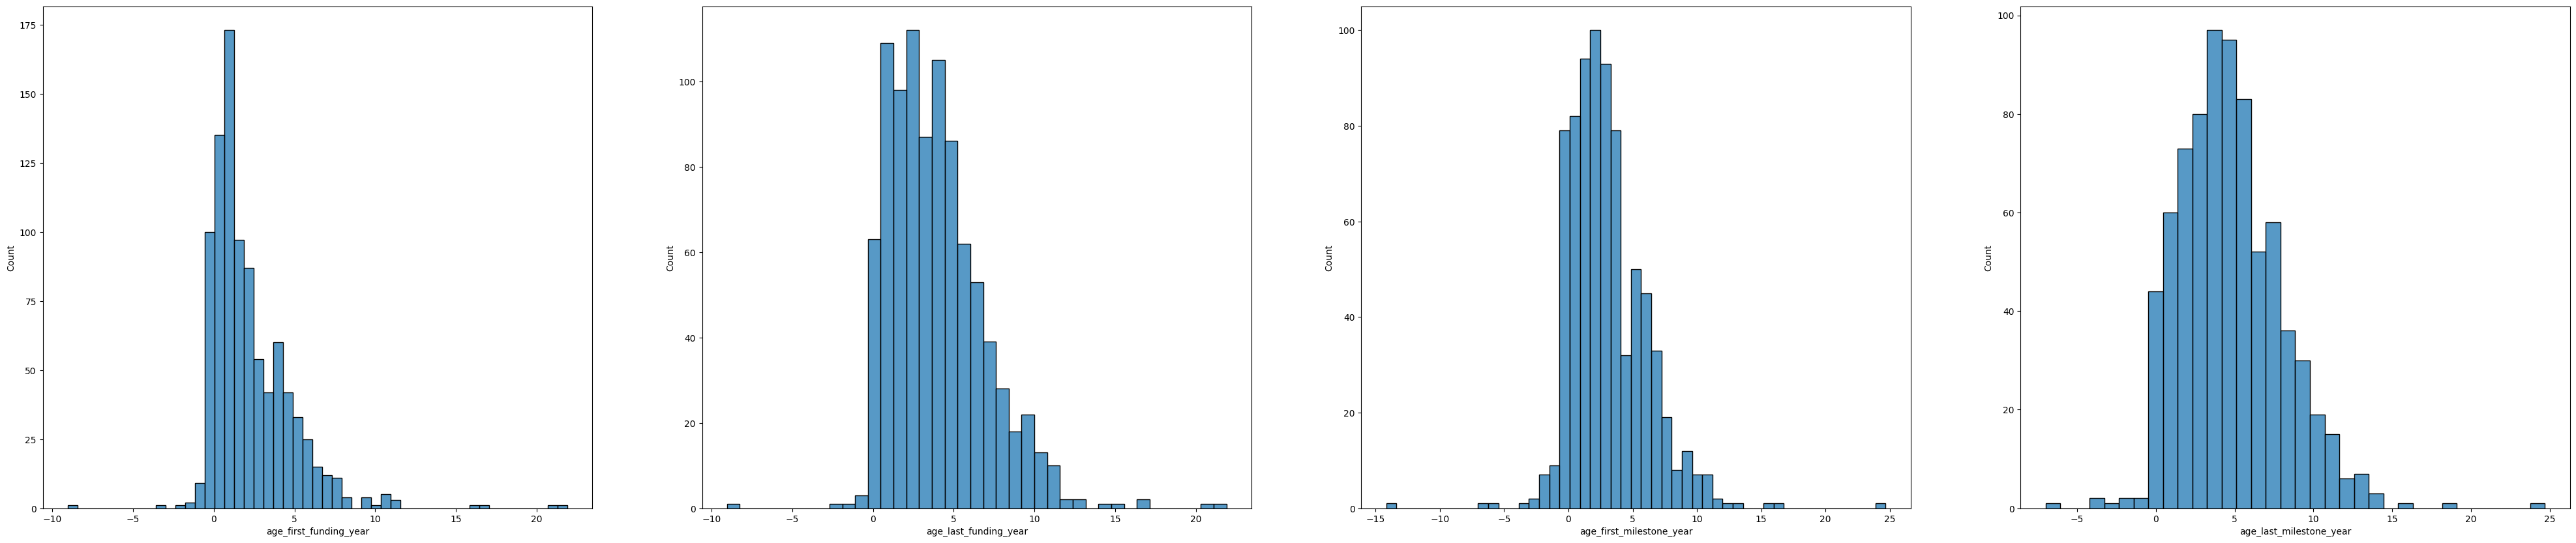

In [74]:
var = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year']

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (50,10))

for k, ax in zip(range(4), axes.flatten()):
    sns.histplot(data = data, x = f'{var[k]}', ax = ax)

In [75]:
data['age_first_funding_year'] = np.where(data['age_first_funding_year']<0,0,data['age_first_funding_year'])
data['age_last_funding_year'] = np.where(data['age_last_funding_year']<0,0,data['age_last_funding_year'])
data['age_first_milestone_year'] = np.where(data['age_first_milestone_year']<0,0,data['age_first_milestone_year'])
data['age_last_milestone_year'] = np.where(data['age_last_milestone_year']<0,0,data['age_last_milestone_year'])

<Axes: xlabel='age_first_milestone_year', ylabel='Count'>

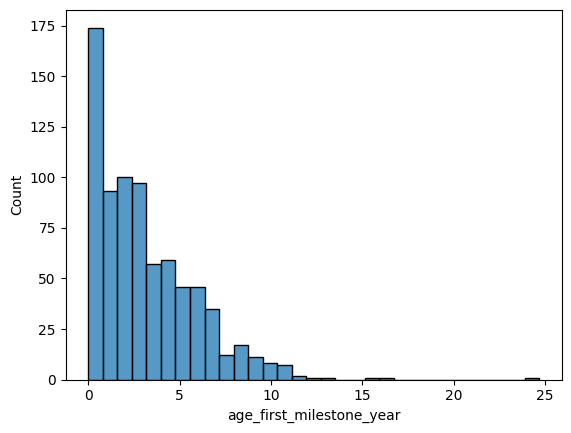

In [76]:
#Handling missing values

sns.histplot(data = data, x = 'age_first_milestone_year')

<Axes: xlabel='age_last_milestone_year', ylabel='Count'>

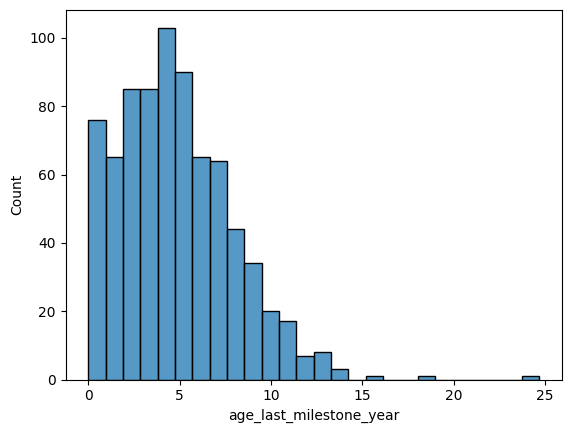

In [77]:
sns.histplot(data = data, x = 'age_last_milestone_year')

In [100]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score, precision_recall_curve

import pickle
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

In [84]:
predict_gb=[]
predict_svm=[]
predict_rf=[]
predict_lr=[]
predict_mnb=[]
predict_mlp=[]
predict_knn=[]
predict_rd=[]
predict_ret=[]
predict_gbc=[]
predict_xgbc=[]
predict_lgbm=[]
sum={}

In [85]:
def runLGBMClassifier(X_train, X_test, y_train, y_test):

  lgbm_cls = LGBMClassifier()

  lgbm_cls.fit(X_train, y_train)
  predict = lgbm_cls.predict(X_test)
  predict_lgbm=predict
  print(predict_lgbm)
  sum["predict_lgbm"] =predict_lgbm
  calculateMetrics(y_test,predict,"LGBMClassifier")

In [86]:
def runXGBClassifier(X_train, X_test, y_train, y_test):

  xgbc_cls = XGBClassifier()

  xgbc_cls.fit(X_train, y_train)
  predict = xgbc_cls.predict(X_test)
  predict_xgbc=predict
  print(predict_xgbc)
  sum["predict_xgbc"] =predict_xgbc
  calculateMetrics(y_test,predict,"XGBClassifier")

In [87]:
def runGradientBoostingClassifier(X_train, X_test, y_train, y_test):

  gbc_cls = ExtraTreesClassifier(n_estimators=100,max_depth=1, random_state=0)
  gbc_cls.fit(X_train, y_train)
  predict = gbc_cls.predict(X_test)
  predict_gbc=predict
  print(predict_gbc)
  sum["predict_gbc"] =predict_gbc
  calculateMetrics(y_test,predict,"GradientBoostingClassifier")

In [88]:
def runExtraTreesClassifier(X_train, X_test, y_train, y_test):

  et_cls = ExtraTreesClassifier(n_estimators=100,criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
  et_cls.fit(X_train, y_train)
  predict = et_cls.predict(X_test)
  predict_ret=predict
  print(predict_ret)
  sum["predict_ret"]=predict_ret

  calculateMetrics(y_test,predict,"ExtraTreesClassifier")

In [90]:
def calculateMetrics(y_test,predict,name):
  p = precision_score(y_test, predict,average='macro') * 100
  r = recall_score(y_test, predict,average='macro') * 100
  f = f1_score(y_test, predict,average='macro') * 100
  a = accuracy_score(y_test,predict)*100
  accuracy.append(a)
  precision.append(p)
  recall.append(r)
  fscore.append(f)
  # Average precision score
  #average_precision = average_precision_score(y_test,predict)
  # Data to plot precision - recall curve
  #precision, recall, thresholds = precision_recall_curve(y_test, predict)
  # Use AUC function to calculate the area under the curve of precision recall curve
  # auc_precision_recall = auc(r/100, p/100)
  #print(name+" auc_precision_recall : "+str(auc_precision_recall)+"\n")
  #print(name+" average_precision : "+str(average_precision * 100)+"\n")
  print(name+" Accuracy : "+str(a)+"\n")
  print(name+" Precision : "+str(p)+"\n")
  print(name+" Recall : "+str(r)+"\n")
  print(name+" FSCORE : "+str(f)+"\n\n")
  print(name+" Sum of all :"+str(a+p+r+f))
  actual = y_test
  predicted =predict
  confusion_matrix = metrics.confusion_matrix(actual, predicted)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
  cm_display.plot()
  plt.show()


In [91]:
def runDecisionTree(X_train, X_test, y_train, y_test):

  dt_cls = DecisionTreeClassifier(max_depth=2,criterion="entropy")
  dt_cls.fit(X_train, y_train)
  predict = dt_cls.predict(X_test)
  predict_rd=predict
  calculateMetrics(y_test,predict,"Decision Tree Algorithm")
  print(predict_rd)
  sum["predict_rd"]=predict_rd

In [92]:
def runKNeighborsClassifier(X_train, X_test, y_train, y_test):

  kn_cls = KNeighborsClassifier()
  kn_cls.fit(X_train, y_train)
  predict = kn_cls.predict(X_test)
  predict_knn=predict
  calculateMetrics(y_test,predict,"KNeighborsClassifier")
  print(predict_knn)
  sum["predict_knn"]=predict_knn

In [93]:
def runMLPClassifier(X_train, X_test, y_train, y_test):

  mlp_cls = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,solver='lbfgs')
  mlp_cls.fit(X_train, y_train)
  predict = mlp_cls.predict(X_test)
  predict_mlp=predict
  calculateMetrics(y_test,predict,"MLPClassifier")
  print(predict_mlp)
  sum["predict_mlp"]=predict_mlp

In [94]:
def runMultinomialNB(X_train, X_test, y_train, y_test):

  mnb_cls = MultinomialNB()
  mnb_cls.fit(X_train, y_train)
  predict = mnb_cls.predict(X_test)
  predict_mnb=predict
  print(predict_mnb)
  sum["predict_mnb"]=predict_mnb

  calculateMetrics(y_test,predict,"MultinomialNB")

In [95]:
def runLogisticRegression(X_train, X_test, y_train, y_test):

  ls_cls = LogisticRegression(solver = 'lbfgs')
  ls_cls.fit(X_train, y_train)
  predict = ls_cls.predict(X_test)
  predict_lr=predict
  sum["predict_lr"]=predict_lr
  print(predict_lr)
  calculateMetrics(y_test,predict,"LogisticRegression")

In [97]:
def runRF( X_train, X_test, y_train, y_test):

  rf_cls =RandomForestClassifier(n_estimators=2,criterion="entropy",max_features="sqrt")
  rf_cls.fit(X_train, y_train)
  predict = rf_cls.predict(X_test)
  predict_rf=predict
  print(predict_rf)
  sum["predict_rf"]=predict_rf
  calculateMetrics(y_test,predict,"Random Forest Algorithm")
  classifier = rf_cls
  svm_cls = svm.SVC(probability=True)
  svm_cls.fit(X_train, y_train)
  predict = svm_cls.predict(X_test)
  predict_svm=predict
  sum["predict_svm"]=predict_svm
  print(predict_svm)
  calculateMetrics(y_test,predict,"SVM Algorithm")

In [98]:
def runGB(X_train, X_test, y_train, y_test):

  gb = GradientBoostingClassifier()
  gb.fit(X_train, y_train)
  predict = gb.predict(X_test)
  predict_gb=predict
  sum["predict_gb"]=predict_gb
  calculateMetrics(y_test,predict,"Gradient Boosting Algorithm")
  print(predict_gb)

[LightGBM] [Info] Number of positive: 399, number of negative: 187
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 384
[LightGBM] [Info] Number of data points in the train set: 586, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.680887 -> initscore=0.757853
[LightGBM] [Info] Start training from score 0.757853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

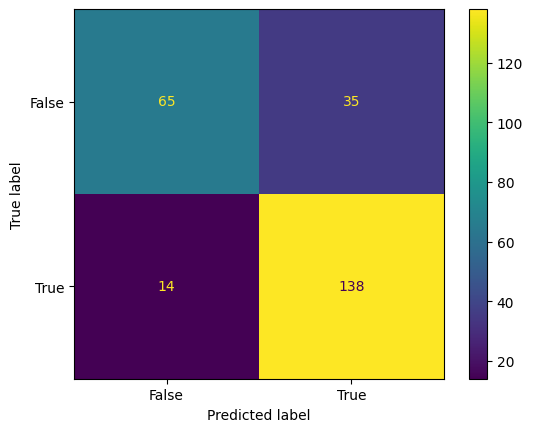

In [101]:
runLGBMClassifier(X_train, X_test, y_train, y_test)

[1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0
 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0]
XGBClassifier Accuracy : 80.55555555555556

XGBClassifier Precision : 81.27272727272728

XGBClassifier Recall : 77.72368421052632

XGBClassifier FSCORE : 78.66583735033433


XGBClassifier Sum of all :318.21780438914345


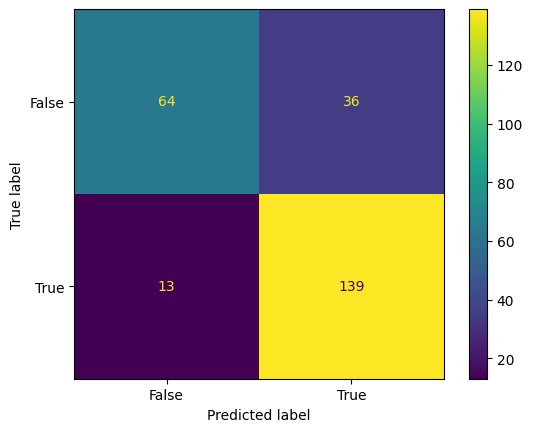

In [102]:
runXGBClassifier(X_train, X_test, y_train, y_test)

[0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1
 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1
 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1
 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0
 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1
 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0]
Random Forest Algorithm Accuracy : 75.79365079365078

Random Forest Algorithm Precision : 75.0841002856236

Random Forest Algorithm Recall : 76.0

Random Forest Algorithm FSCORE : 75.26032027037901


Random Forest Algorithm Sum of all :302.1380713496534


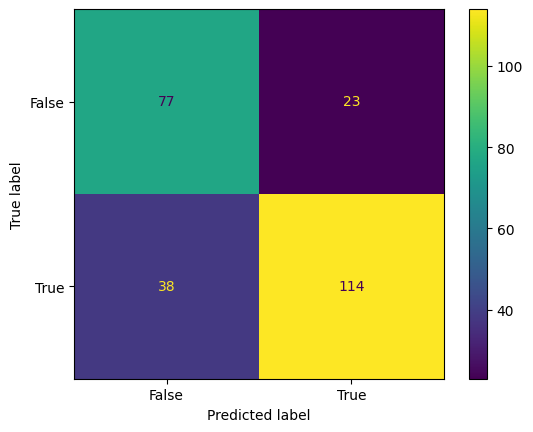

[1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1]
SVM Algorithm Accuracy : 78.57142857142857

SVM Algorithm Precision : 83.67003367003367

SVM Algorithm Recall : 73.6842105263158

SVM Algorithm FSCORE : 74.75324675324674


SVM Algorithm Sum of all :310.6789195210248


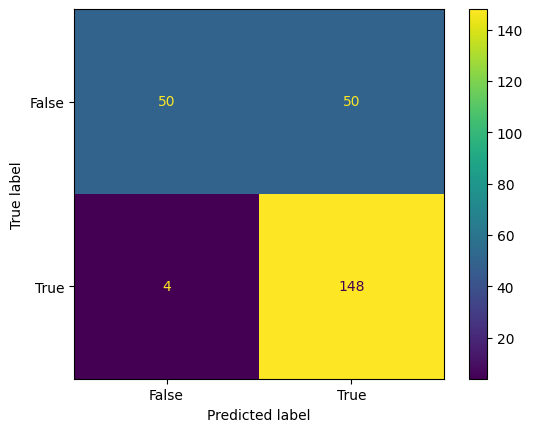

In [103]:
runRF( X_train, X_test, y_train, y_test)

Gradient Boosting Algorithm Accuracy : 81.34920634920636

Gradient Boosting Algorithm Precision : 82.49717514124293

Gradient Boosting Algorithm Recall : 78.38157894736842

Gradient Boosting Algorithm FSCORE : 79.42857142857143


Gradient Boosting Algorithm Sum of all :321.6565318663892


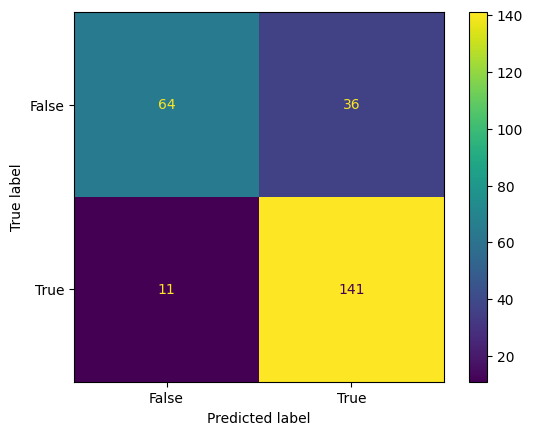

[1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0
 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1
 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0]


In [104]:
runGB(X_train, X_test, y_train, y_test)

Decision Tree Algorithm Accuracy : 79.76190476190477

Decision Tree Algorithm Precision : 81.55143739605607

Decision Tree Algorithm Recall : 76.21052631578948

Decision Tree Algorithm FSCORE : 77.29930230504283


Decision Tree Algorithm Sum of all :314.82317077879316


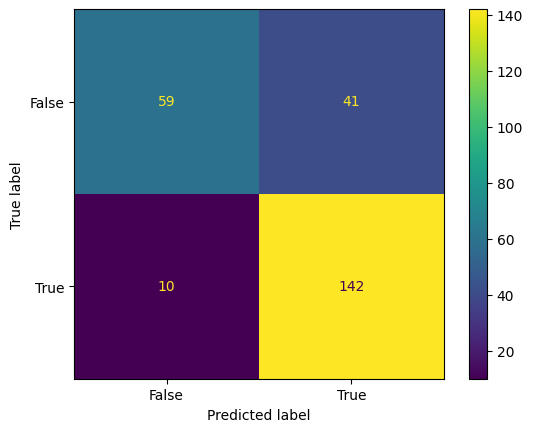

[1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0]


In [105]:
runDecisionTree(X_train, X_test, y_train, y_test)

[1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1
 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0]
LogisticRegression Accuracy : 80.55555555555556

LogisticRegression Precision : 81.54802259887006

LogisticRegression Recall : 77.55263157894736

LogisticRegression FSCORE : 78.55319148936171


LogisticRegression Sum of all :318.2094012227347


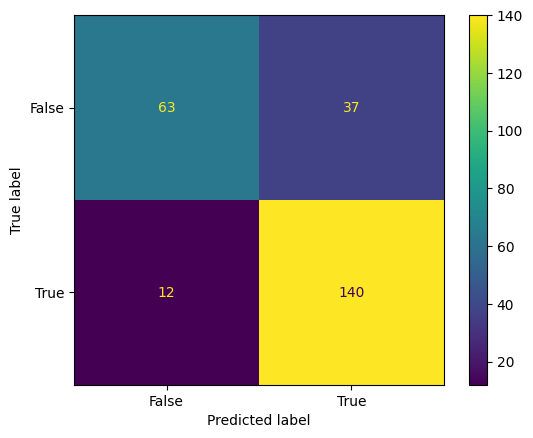

In [106]:
runLogisticRegression(X_train, X_test, y_train, y_test)

MLPClassifier Accuracy : 78.17460317460318

MLPClassifier Precision : 80.68783068783068

MLPClassifier Recall : 74.03947368421053

MLPClassifier FSCORE : 75.06431822679596


MLPClassifier Sum of all :307.9662257734403


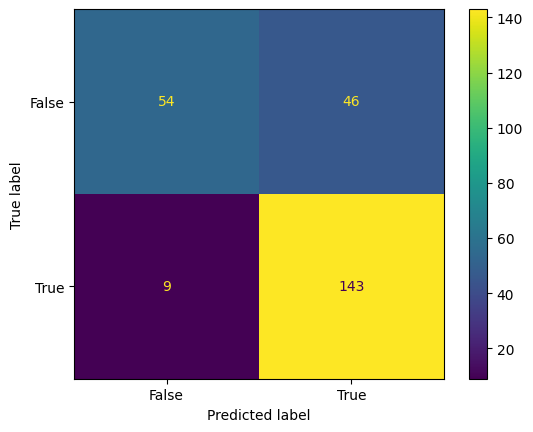

[0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1
 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0]


In [107]:
runMLPClassifier(X_train, X_test, y_train, y_test)

[0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
MultinomialNB Accuracy : 67.06349206349206

MultinomialNB Precision : 70.755500207555

MultinomialNB Recall : 59.86842105263157

MultinomialNB FSCORE : 57.61100865370975


MultinomialNB Sum of all :255.2984219773884


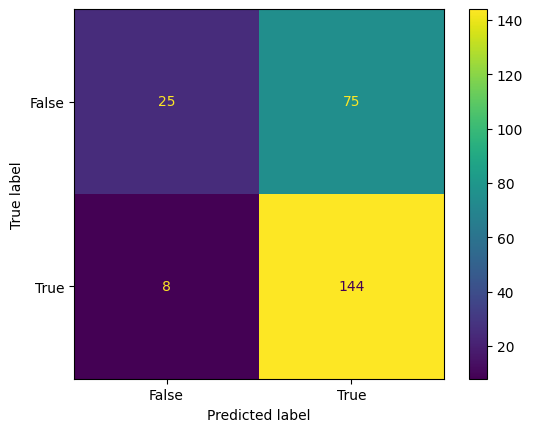

In [108]:
runMultinomialNB(X_train, X_test, y_train, y_test)

KNeighborsClassifier Accuracy : 78.17460317460318

KNeighborsClassifier Precision : 80.27560674619498

KNeighborsClassifier Recall : 74.21052631578948

KNeighborsClassifier FSCORE : 75.2212389380531


KNeighborsClassifier Sum of all :307.88197517464073


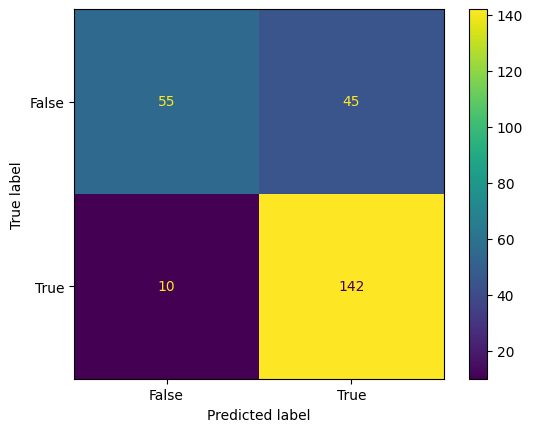

[0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1]


In [109]:
runKNeighborsClassifier(X_train, X_test, y_train, y_test)

[1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0]
ExtraTreesClassifier Accuracy : 79.76190476190477

ExtraTreesClassifier Precision : 81.55143739605607

ExtraTreesClassifier Recall : 76.21052631578948

ExtraTreesClassifier FSCORE : 77.29930230504283


ExtraTreesClassifier Sum of all :314.82317077879316


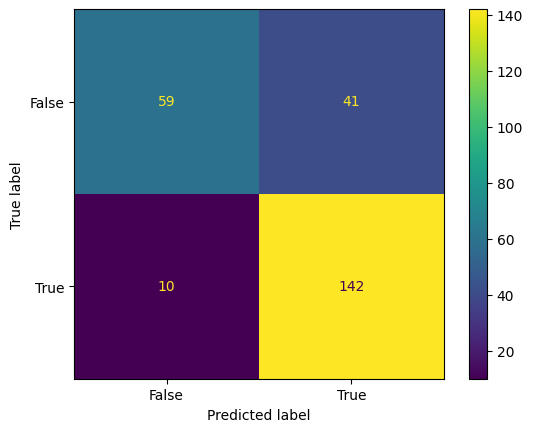

In [110]:
runExtraTreesClassifier(X_train, X_test, y_train, y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
GradientBoostingClassifier Accuracy : 60.317460317460316

GradientBoostingClassifier Precision : 30.158730158730158

GradientBoostingClassifier Recall : 50.0

GradientBoostingClassifier FSCORE : 37.62376237623762


GradientBoostingClassifier Sum of all :178.0999528524281


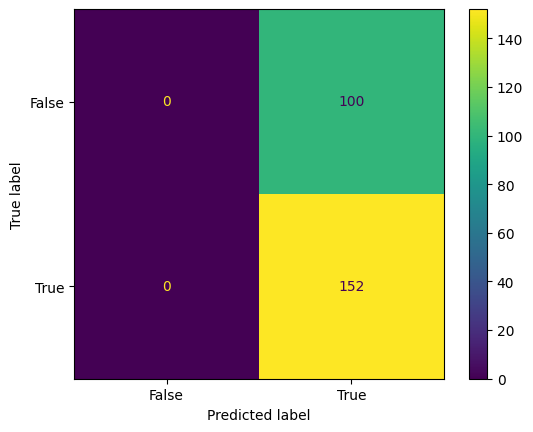

In [111]:
runGradientBoostingClassifier(X_train, X_test, y_train, y_test)

In [112]:
print(len(sum))

12


In [113]:
for key in sum.keys():
  print(key,len(sum[key]))

predict_lgbm 252
predict_xgbc 252
predict_rf 252
predict_svm 252
predict_gb 252
predict_rd 252
predict_lr 252
predict_mlp 252
predict_mnb 252
predict_knn 252
predict_ret 252
predict_gbc 252


In [114]:
print(len(sum['predict_gb']))

252


In [115]:
print(len(sum['predict_lgbm']))

252


In [121]:
cls = GradientBoostingClassifier(random_state=7)
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)

In [122]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8134920634920635
[[ 64  36]
 [ 11 141]]
              precision    recall  f1-score   support

           0       0.85      0.64      0.73       100
           1       0.80      0.93      0.86       152

    accuracy                           0.81       252
   macro avg       0.82      0.78      0.79       252
weighted avg       0.82      0.81      0.81       252



In [123]:
cls1 = RandomForestClassifier(random_state=7)
cls1.fit(X_train,y_train)
y_pred = cls1.predict(X_test)

In [124]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8253968253968254
[[ 63  37]
 [  7 145]]
              precision    recall  f1-score   support

           0       0.90      0.63      0.74       100
           1       0.80      0.95      0.87       152

    accuracy                           0.83       252
   macro avg       0.85      0.79      0.80       252
weighted avg       0.84      0.83      0.82       252

